
Aula 3 - Curso Machine Learning - Alura

In [1]:
!pip install seaborn==0.9.0

In [2]:
import pandas as pd 
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
a_renomear = {
    "unfinished" : "nao_finalizado",
    "expected_hours" : "horas_esperadas",
    "price" : "preco"
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
troca =  {
    0 : 1,
    1 : 0
}
dados ['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


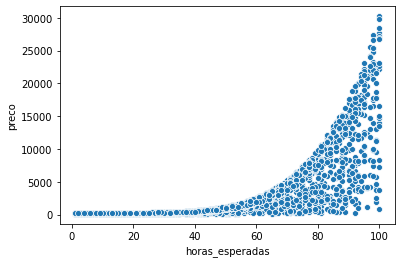

In [5]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y = "preco", data = dados)

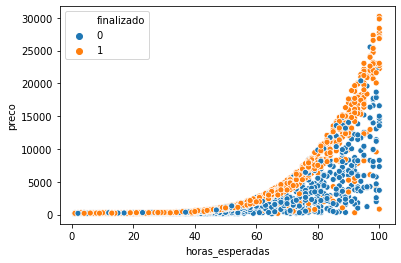

In [6]:
sns.scatterplot(x="horas_esperadas", y = "preco",hue = "finalizado",data = dados)

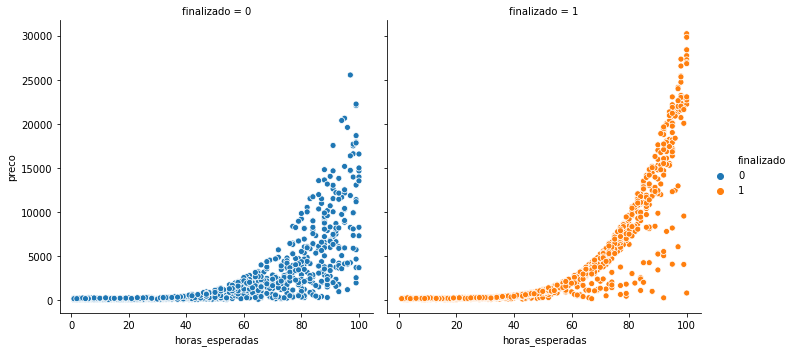

In [7]:
sns.relplot(x="horas_esperadas", y = "preco",hue = "finalizado",col = "finalizado",data = dados)

In [8]:
x = dados[["horas_esperadas","preco"]]
y = dados["finalizado"]

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

seed = 25
np.random.seed(seed)
treino_x,teste_x,treino_y,teste_y = train_test_split(x,y,random_state = seed,test_size = 0.25, stratify = y)
print("Treinamos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes) *100
print("A acertividade foi de %.2f%%" % acuracia)

Treinamos com 1617 elementos e testaremos com 540 elementos
A acertividade foi de 61.85%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [35]:
import numpy as np

In [36]:
previsoes_de_base = np.ones(540)

acuracia = accuracy_score(teste_y,previsoes_de_base) *100
print("A acertividade de baseline foi de %.2f%%" % acuracia)

A acertividade de baseline foi de 52.59%


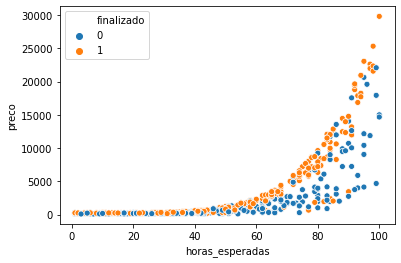

In [37]:
sns.scatterplot(x="horas_esperadas", y = "preco",hue = teste_y,data =teste_x)

In [38]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

In [39]:
pixels = 100
eixo_x = np.arange(x_min,x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min,y_max, (y_max - y_min) / pixels)

In [40]:
xx,yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]


In [41]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


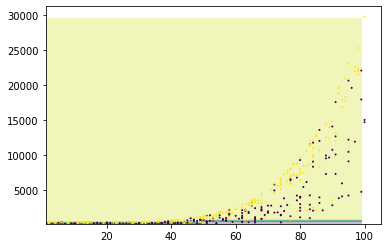

In [42]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,Z,alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c = teste_y, s=1)

#curva de decisao do algoritmo 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

seed = 20
np.random.seed(seed)
treino_x,teste_x,treino_y,teste_y = train_test_split(x,y,random_state = seed,test_size = 0.25, stratify = y)
print("Treinamos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
modelo = SVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes) *100
print("A acertividade foi de %.2f%%" % acuracia)

Treinamos com 1617 elementos e testaremos com 540 elementos
A acertividade foi de 53.15%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


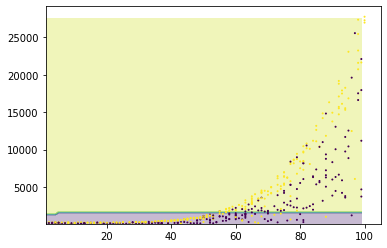

In [45]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
pixels = 100
eixo_x = np.arange(x_min,x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min,y_max, (y_max - y_min) / pixels)
xx,yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx,yy,Z,alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c = teste_y, s=1)

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

seed = 20
np.random.seed(seed)
raw_treino_x,raw_teste_x,treino_y,teste_y = train_test_split(x,y,random_state = seed,test_size = 0.25, stratify = y)
print("Treinamos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)
modelo = SVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes) *100
print("A acertividade foi de %.2f%%" % acuracia)


Treinamos com 1617 elementos e testaremos com 540 elementos
A acertividade foi de 70.37%


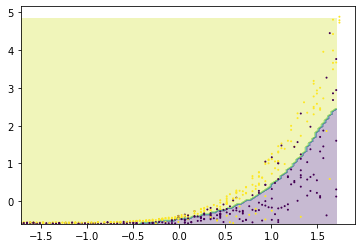

In [51]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
pixels = 100
eixo_x = np.arange(x_min,x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min,y_max, (y_max - y_min) / pixels)
xx,yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx,yy,Z,alpha = 0.3)
plt.scatter(data_x, data_y, c = teste_y, s=1)